In [1]:
import sys
sys.path.append("../..")

%load_ext autoreload
%autoreload 1
%aimport pygenesig.validation
%aimport pygenesig.gini
%aimport pygenesig.bioqc
%aimport pygenesig.perfmeasures
%matplotlib inline

from pygenesig.validation import * 
from pygenesig.gini import * 
from pygenesig.bioqc import * 
from pygenesig.limma import * 
import pygenesig.perfmeasures as pm
import numpy as np
import pandas as pd

import seaborn as sns
from pylab import * 

# Signature Generation and Validation on GTEx with gini-index. 
In this document, we generate and test the signatures ** on the same dataset **. The final result might therefore not be representative. This document is to demonstrate the ease-of-use of *pygenesig*. 

## Load a dataset
Expression Matrix + Tissue Labels

In [2]:
expr = np.load("../../data/gtex/exprs.npy")
target = np.genfromtxt("../../data/gtex/target.csv", delimiter=",", dtype=str)
covariates = pd.read_csv("../../data/gtex/covariates.csv", index_col=0)

In [3]:
covariates = covariates[["RIN", "Gender"]]

## Make Signatures

In [4]:
fold_change=10

In [5]:
sg = LimmaSignatureGenerator(expr, target, covariates, fold_change=fold_change)

In [6]:
signatures = sg.mk_signatures()

## Test Signatures
(You could also load a different dataset, e.g. from a different species here)

In [7]:
st = BioQCSignatureTester(expr, target)

In [8]:
actual, predicted = st.test_signatures(signatures)

/pstore/home/sturmg/projects/gene-set-study/pygenesig/bioqc.py:95: RuntimeWarning: divide by zero encountered in log10
  bioqc_res_log = -np.log10(bioqc_res)


In [9]:
confmat = st.confusion_matrix(signatures, actual, predicted)

In [10]:
sig_labels = st.sort_signatures(signatures)

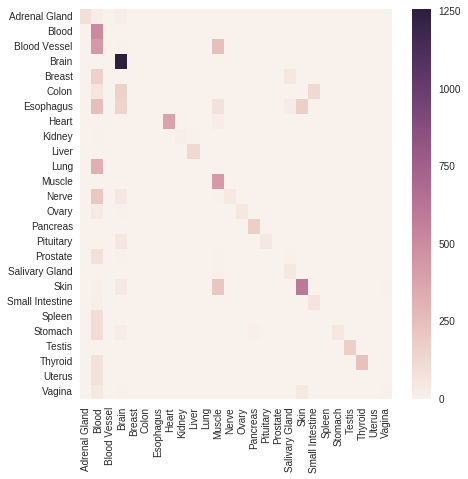

In [11]:
fig, ax = subplots(figsize=(7, 7))
sns.heatmap(confmat, ax=ax, xticklabels=sig_labels, yticklabels=sig_labels)

Binary classifications performance per signatures

In [13]:
print("Tissue", "Sens", "Spec", "MCC")
for i, sig in enumerate(sig_labels):
    TP = confmat[i, i]
    FN = np.sum(confmat[i, :]) - TP
    FP = np.sum(confmat[:, i]) - TP
    TN = np.sum(confmat) - TP - FN - FP
    m = (TP, FN, FP, TN)
    print(sig, pm.sens(*m), pm.spec(*m), pm.mcc(*m))

Tissue Sens Spec MCC
Adrenal Gland 0.641379310345 1.0 0.798206356449
Blood 1.0 0.72583030792 0.381379995438
Blood Vessel 0.0 1.0 nan
Brain 1.0 0.920017939901 0.803525740454
Breast 0.0 1.0 nan
Colon 0.0 1.0 nan
Esophagus 0.0 1.0 nan
Heart 0.941747572816 0.999867303609 0.967592561847
Kidney 0.59375 1.0 0.769919811789
Liver 1.0 0.99897815813 0.967496976811
Lung 0.0 1.0 nan
Muscle 1.0 0.919792498005 0.61876964245
Nerve 0.131578947368 1.0 0.356631920852
Ovary 0.484536082474 1.0 0.69388023934
Pancreas 1.0 0.998328404269 0.963220811771
Pituitary 0.446601941748 1.0 0.665868184786
Prostate 0.0188679245283 1.0 0.136458691909
Salivary Gland 0.859649122807 0.988974781397 0.554177720335
Skin 0.684269662921 0.969679795976 0.696658835621
Small Intestine 0.75 0.984732824427 0.513839672406
Spleen 0.0 1.0 nan
Stomach 0.244791666667 1.0 0.490203247365
Testis 1.0 0.998971193416 0.977022248318
Thyroid 0.736842105263 1.0 0.853650211661
Uterus 0.0 1.0 nan
Vagina 0.0520833333333 0.998853795211 0.13835444194


/pstore/home/sturmg/projects/gene-set-study/pygenesig/perfmeasures.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(TP * TN + FP * FN, sqrt((TP+FP) * (TP+FN) * (TN+FP) * (TN+FN)))
